# MatplotLib

In [1]:


# import seaborn as sns
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.dates as mdate
import yfinance as yf
from datetime import datetime, date
import numpy as np
import os
import mplcyberpunk


In [2]:
cotacoes = yf.download('^BVSP')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


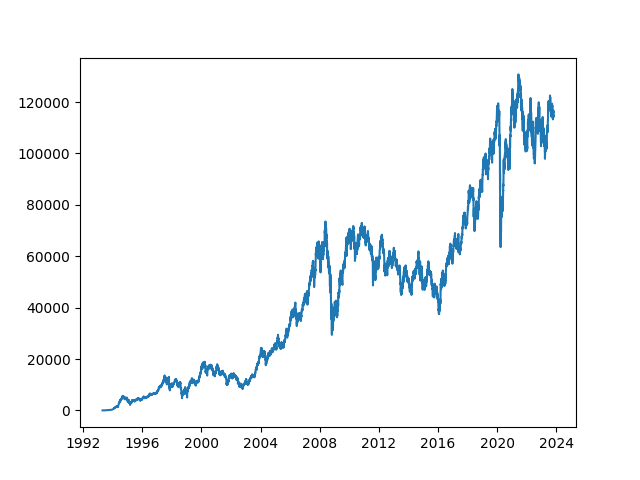

In [3]:
fig, ax = plt.subplots()

ax.plot(cotacoes)

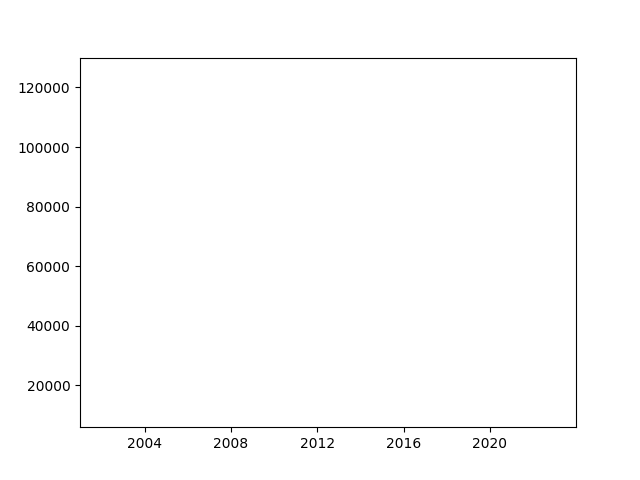

In [4]:
cotacoes_ani = cotacoes.resample('M').last()

fig, ax = plt.subplots()
ax.set_xlim(date(2001, 1, 1), date(2023, 12, 31))
ax.set_ylim(6000, 130000)

def animate(i):
    data = cotacoes_ani.iloc[:int(i+1)]
    ax.plot(data.index, data.values, color = 'r')

ani = FuncAnimation(fig, animate, frames = range(0, len(cotacoes_ani)),
    interval=50, repeat = False)


plt.show()

[*********************100%%**********************]  1 of 1 completed


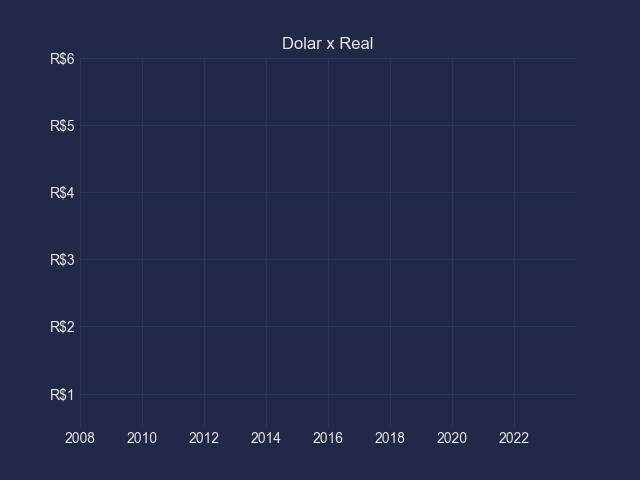

In [7]:
# gabarito 108

dolar = yf.download('USDBRL=X', '2007-12-28')['Adj Close']

dolar = dolar.resample('M').last()

plt.style.use('cyberpunk')

fig, ax = plt.subplots()
ax.set_xlim(date(2008, 1, 1), date(2023, 12, 31))
ax.set_ylim(0.5, 6)
ax.yaxis.set_major_formatter('R${x:1.0f}')
ax.set_title('Dolar x Real')

def animate(i):

    data = dolar.iloc[:int(i+1)]
    ax.plot(data.index, data.values, color= "#00FFFF")

ani = FuncAnimation(fig, animate, frames = range(0, len(dolar)), interval= 50, repeat = False)

[*********************100%%**********************]  3 of 3 completed


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_9408\71191911.py:6: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  retornos = cotacoes.pct_change().dropna()


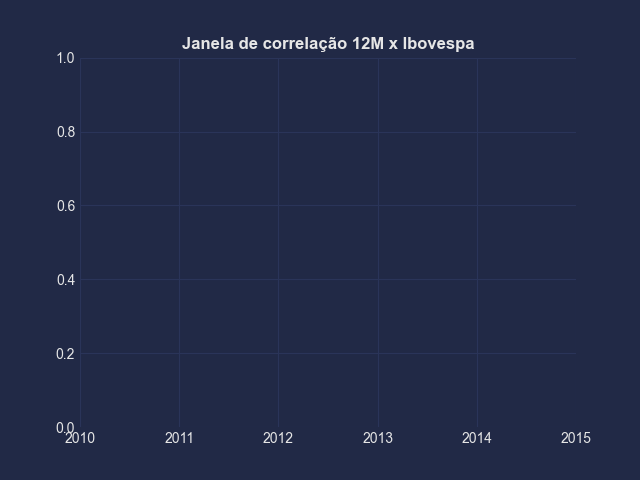

In [15]:
#gabarito 109
acoes = ["WEGE3.SA", 'VALE3.SA', '^BVSP']

cotacoes = yf.download(acoes, '2009-01-01', "2015-01-01")['Adj Close']

retornos = cotacoes.pct_change().dropna()

acoes.remove("^BVSP")

janela_cor_weg = retornos['WEGE3.SA'].rolling(252).corr(retornos['^BVSP']).dropna()
janela_cor_vale = retornos['VALE3.SA'].rolling(252).corr(retornos['^BVSP']).dropna()

janela_cor_weg = janela_cor_weg.resample("M").last()
janela_cor_vale = janela_cor_vale.resample("M").last()


fig, ax = plt.subplots()

ax.set_xlim(date(2010, 1, 1), date(2015, 1, 1))
ax.set_ylim(0, 1)
ax.set_title("Janela de correlação 12M x Ibovespa", fontweight = 'bold')

def animate(i):

    data = janela_cor_weg.iloc[:int(i+1)]
    weg = ax.plot(data.index, data.values, color = '#00FFFF', label = "WEGE3")
    data = janela_cor_vale.iloc[:int(i+1)]
    weg = ax.plot(data.index, data.values, color = 'fuchsia', label = "VALE3")

    if i == 0:
        ax.legend(["WEGE3", "VALE3"], loc= 'lower left')

ani = FuncAnimation(fig, animate, frames = range(0, len(cotacoes)), interval= 10, repeat = False)
